In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as multi
from matplotlib import pyplot as plt


###The following is used to create some sensible results folders according to the year/month
import datetime
year = datetime.date.today().year
month = datetime.date.today().month
import os
figs_dir = '../Results/Figures/{}_{:02}'.format(year, month)
if not os.path.exists(figs_dir):
    os.makedirs(figs_dir)

In [3]:
import matplotlib
###Default for jupyter display
matplotlib.rcParams['figure.dpi']= 150

matplotlib.rcParams['xtick.labelsize'] = 8
matplotlib.rcParams['ytick.labelsize'] = 8
matplotlib.rcParams['axes.labelsize'] = 8
matplotlib.rcParams['axes.titlesize'] = 8

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = '0.8'
matplotlib.rcParams['grid.linewidth'] = '0.5'

matplotlib.rcParams['axes.edgecolor'] = '0.25'
matplotlib.rcParams['xtick.color'] = '0'
matplotlib.rcParams['ytick.color'] = '0'

matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1
matplotlib.rcParams['ytick.major.size'] = 5
matplotlib.rcParams['xtick.major.size'] = 5
matplotlib.rcParams['axes.spines.right'] = True
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.top'] = True
matplotlib.rcParams['axes.spines.bottom'] = True

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
matplotlib.rcParams['font.weight']='normal'
matplotlib.rcParams['axes.axisbelow'] = True
matplotlib.rcParams['legend.fontsize'] = 8
# matplotlib.rcParams['text.usetex'] = True

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['pdf.fonttype'] = 42

# Establish a translation efficiency model (or two)

In [4]:
host_df = pd.read_csv('../Data/562_associated_data/ecoli.combined.tsv', sep='\t', index_col=0)
print(host_df.shape)
host_df.head()

(4018, 21)


,Genome_source,Start,Stop,Strand,CDS_seq,Upstream_seq,locus_tag,gene_id,aSD_binding,sec_struct,...,iCUB,GC_cds,GC_upstream,Start_accessibility,prot_abundance,trans_eff_2014,trans_eff_2019,essentiality_ds1,essentiality_ds2,essentiality
0,NC_000913.3,336,2799,+,ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAAC...,TTTTCGACCAAAGGTAACGAGGTAACAACC,b0002,thrA,-5.42,-21.31,...,55.949262,0.530654,0.433333,-8.50,317.0,0.98,NaN,Non-essential,Non-essential,Non-essential
1,NC_000913.3,2800,3733,+,ATGGTTAAAGTTTATGCCCCGGCTTCCAGTGCCAATATGAGCGTCG...,GTACCCTCTCATGGAAGTTAGGAGTCTGAC,b0003,thrB,-6.51,-21.87,...,56.062386,0.562701,0.500000,-7.82,76.3,0.63,NaN,Non-essential,Non-essential,Non-essential
2,NC_000913.3,3733,5020,+,ATGAAACTCTACAATCTGAAAGATCACAACGAGCAGGTCAGCTTTG...,ACGGCGGGCGCACGAGTACTGGAAAACTAA,b0004,thrC,-3.40,-24.44,...,53.052776,0.528361,0.566667,-3.73,530.0,1.40,NaN,Non-essential,Non-essential,Non-essential
3,NC_000913.3,5233,5530,+,GTGAAAAAGATGCAATCTATCGTACTCGCACTTTCCCTGGTTCTGG...,CATAACGGGCAATGATAAAAGGAGTAACCT,b0005,yaaX,-6.51,-17.15,...,50.705530,0.538721,0.400000,-9.77,NaN,0.28,NaN,Non-essential,Non-essential,Non-essential
4,NC_000913.3,5682,6459,-,ATGCTGATTCTTATTTCACCTGCGAAAACGCTTGATTACCAAAGCC...,GTCGGCATAAATTTCCTGCAAGGACTGGAT,b0006,yaaA,-4.00,-18.60,...,53.158862,0.496782,0.466667,-10.08,47.9,2.07,0.410931,Non-essential,Non-essential,Non-essential


In [5]:
# teff_model1 = smf.ols('np.log(trans_eff_2014) ~ aSD_binding + sec_struct + iCUB', data=host_df).fit()
teff_model1 = smf.ols('np.log(trans_eff_2014) ~ aSD_binding + sec_struct', data=host_df).fit()
teff_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(trans_eff_2014)   R-squared:                       0.165
Model:                                OLS   Adj. R-squared:                  0.165
Method:                     Least Squares   F-statistic:                     213.0
Date:                    Tue, 20 Apr 2021   Prob (F-statistic):           4.07e-85
Time:                            13:51:32   Log-Likelihood:                -2624.3
No. Observations:                    2152   AIC:                             5255.
Df Residuals:                        2149   BIC:                             5272.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0705      0.075     14.236      0.000       0.923       1.218
aSD_binding    -0.0484      0.008     -5.908      0.000      -0.065      -0.032
sec_struct      0.0753      0.004     20.608      0.000       0.068       0.083
==============================================================================
Omnibus:                      455.564   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1072.363
Skew:                          -1.167   Prob(JB):                    1.38e-233
Kurtosis:                       5.552   Cond. No.                         88.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

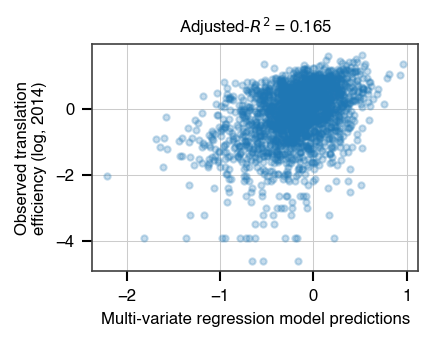

In [25]:
fig, ax = plt.subplots(figsize=(2.8, 2))
ax.plot(teff_model1.predict(host_df), np.log(host_df['trans_eff_2014']), marker='.', linestyle='', alpha=0.25)
ax.set_xlabel('Multi-variate regression model predictions')
ax.set_ylabel('Observed translation\nefficiency (log, 2014)')
ax.set_title('Adjusted-$R^2$ = {:.3f}'.format(teff_model1.rsquared_adj))
plt.savefig(figs_dir + '/teff_model_2014_ecoli.png', dpi=300, bbox_inches='tight')

In [26]:
# teff_model2 = smf.ols('trans_eff_2019 ~ aSD_binding + sec_struct + iCUB', data=host_df).fit()
teff_model2 = smf.ols('np.log(trans_eff_2019) ~ aSD_binding + sec_struct', data=host_df).fit()
teff_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(trans_eff_2019)   R-squared:                       0.113
Model:                                OLS   Adj. R-squared:                  0.110
Method:                     Least Squares   F-statistic:                     41.59
Date:                    Tue, 20 Apr 2021   Prob (F-statistic):           9.92e-18
Time:                            13:55:10   Log-Likelihood:                -855.99
No. Observations:                     657   AIC:                             1718.
Df Residuals:                         654   BIC:                             1731.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.7095      0.165     -4.299      0.000      -1.034      -0.385
aSD_binding    -0.0928      0.017     -5.566      0.000      -0.126      -0.060
sec_struct      0.0746      0.009      8.409      0.000       0.057       0.092
==============================================================================
Omnibus:                       21.158   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.687
Skew:                          -0.367   Prob(JB):                     4.36e-06
Kurtosis:                       3.603   Cond. No.                         91.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

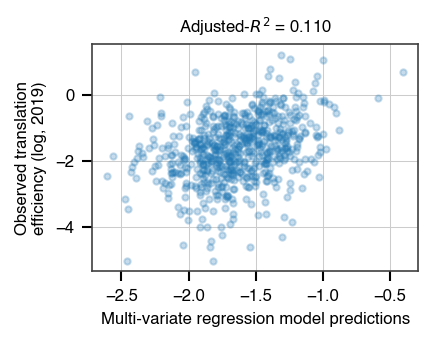

In [27]:
fig, ax = plt.subplots(figsize=(2.8, 2))
ax.plot(teff_model2.predict(host_df), np.log(host_df['trans_eff_2019']), marker='.', linestyle='', alpha=0.25)
ax.set_xlabel('Multi-variate regression model predictions')
ax.set_ylabel('Observed translation\nefficiency (log, 2019)')
ax.set_title('Adjusted-$R^2$ = {:.3f}'.format(teff_model2.rsquared_adj))
plt.savefig(figs_dir + '/teff_model_2019_ecoli.png', dpi=300, bbox_inches='tight')

In [28]:
host_preds1 = teff_model1.predict(host_df)
host_preds2 = teff_model2.predict(host_df)

0.9598108344769576 0.0


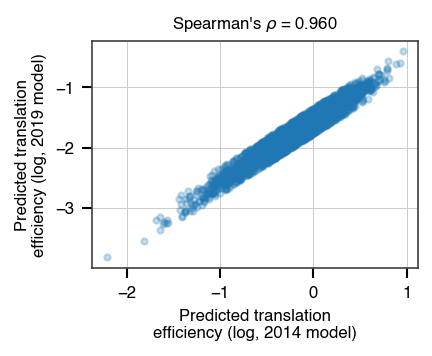

In [29]:
rho, p = stats.spearmanr(host_preds1, host_preds2)
print(rho, p)

fig, ax = plt.subplots(figsize=(2.8, 2))
ax.plot(host_preds1, host_preds2, marker='.', linestyle='',  alpha=0.25)
ax.set_title(r"Spearman's $\rho$ = {:.3f}".format(rho))
ax.set_xlabel('')
ax.set_xlabel('Predicted translation\nefficiency (log, 2014 model)')
ax.set_ylabel('Predicted translation\nefficiency (log, 2019 model)')
plt.savefig(figs_dir + '/teff_model_comparison_ecoli.png', dpi=300, bbox_inches='tight')

# Testing the model against phage genomes

In [12]:
full_df = pd.read_csv('../Data/NCBI_phage_db/paper_dataset_11_2020_with_clusters.tsv', sep='\t')
phages_df = full_df[full_df['Host_species_id']==562]
print(phages_df.shape)
phages_df.head()

(1473, 40)


,Accession,SRA_Accession,Release_Date,Species,Genus,Family,Length,Sequence_Type,Nuc_Completeness,Genotype,...,Host_order_name,Host_family_id,Host_family_name,Host_genus_id,Host_genus_name,arbitrary_cluster_id,ranking_in_cluster,cluster_representative,CDS_density,CDS_number
0,NC_050154,NaN,2020-08-13T00:00:00Z,Escherichia phage D6,NaN,Myoviridae,91159,RefSeq,complete,NaN,...,Enterobacterales,543.0,Enterobacteriaceae,561.0,Escherichia,35,1,1.0,0.897366,118.0
10,NC_049941,NaN,2020-07-29T00:00:00Z,Stx2-converting phage Stx2a_WGPS2,NaN,Siphoviridae,58326,RefSeq,complete,NaN,...,Enterobacterales,543.0,Enterobacteriaceae,561.0,Escherichia,74,1,1.0,0.842300,66.0
11,NC_049942,NaN,2020-07-29T00:00:00Z,Escherichia phage JLK-2012,NaN,Siphoviridae,57198,RefSeq,complete,NaN,...,Enterobacterales,543.0,Enterobacteriaceae,561.0,Escherichia,77,1,1.0,0.860572,79.0
12,NC_049943,NaN,2020-07-29T00:00:00Z,Enterobacteria phage 2851,NaN,Siphoviridae,57248,RefSeq,complete,NaN,...,Enterobacterales,543.0,Enterobacteriaceae,561.0,Escherichia,67,3,NaN,NaN,NaN
13,NC_049944,NaN,2020-07-29T00:00:00Z,Stx2-converting phage Stx2a_WGPS8,NaN,Siphoviridae,55023,RefSeq,complete,NaN,...,Enterobacterales,543.0,Enterobacteriaceae,561.0,Escherichia,67,4,NaN,NaN,NaN


In [13]:
lifestyle_df = pd.read_csv('../Data/lifestyle_results_BACPHLIP.tsv', sep='\t', index_col=1)
lifestyle_df = lifestyle_df[lifestyle_df['host_id']==int(562)]
print(lifestyle_df.shape)
lifestyle_df.head()

(254, 3)


,host_id,phage_lifestyle,lifestyle_probability_difference
phage_id,,,
NC_050154,562,Temperate,0.900
NC_049941,562,Temperate,0.950
NC_049942,562,Temperate,0.975
NC_049924,562,Temperate,0.975
NC_049926,562,Temperate,1.000


In [18]:
mean_virus = []
p_vals = []

comparison_model, comparison_vals, host_mean = teff_model1, host_preds1, np.mean(host_preds1)
# comparison_model, comparison_vals, host_mean = teff_model2, host_preds2, np.mean(host_preds2)

for index in phages_df[phages_df['cluster_representative']==1].index:
    phage_name = phages_df.loc[index]['Accession']
    phage_tsv = '../Data/NCBI_phage_db/phage_genomes/562_phage_genomes/{}.clean.tsv'.format(phage_name)
    
    ind_phage_df = pd.read_csv(phage_tsv, sep='\t')
    ind_phage_preds = comparison_model.predict(ind_phage_df)
    mean_virus.append(ind_phage_preds.mean())
    t, p = stats.ttest_ind(comparison_vals, ind_phage_preds, equal_var=False)
    p_vals.append(p)
    
###Correct the p-value distribution post-hoc
truth_array, correct_p_vals = multi.fdrcorrection(p_vals, alpha=0.01)
#
#
#
zippy = list(zip(p_vals, mean_virus))
lside = len([1 for i,j in zippy if i < 0.01 and j < host_mean])
rside = len([1 for i,j in zippy if i < 0.01 and j >= host_mean])
print('N significant no FDR (total={}):'.format(len(p_vals)), lside, rside)
#
zippy = list(zip(correct_p_vals, mean_virus))
lside = len([1 for i,j in zippy if i < 0.01 and j < host_mean])
rside = len([1 for i,j in zippy if i < 0.01 and j >= host_mean])
print('N significant w/ FDR(total={}):'.format(len(p_vals)), lside, rside)
#
zippy = list(zip(correct_p_vals, mean_virus))
lside = len([1 for i,j in zippy if j < host_mean])
rside = len([1 for i,j in zippy if j >= host_mean])
print('N on either side regardless of significance(total={}):'.format(len(p_vals)), lside, rside)
print('Host value: {}, and mean of viruses: {}'.format(host_mean, np.mean(mean_virus)))

N significant no FDR (total=254): 9 112
N significant w/ FDR(total=254): 9 109
N on either side regardless of significance(total=254): 87 167
Host value: -0.1657332526801096, and mean of viruses: -0.0643608574656468


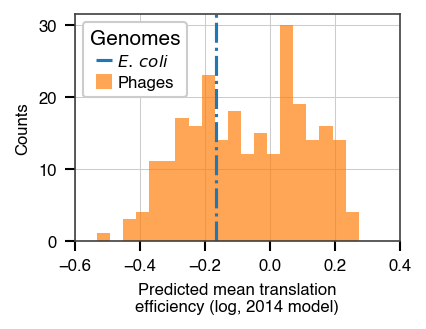

In [33]:
fig, ax = plt.subplots(figsize=(2.8, 2))
ax.hist(mean_virus, 20, color=colors[1], label='Phages', alpha=0.7)
ax.axvline(host_mean, color=colors[0], linestyle='-.', label='$E.\, coli$')
ax.set_ylabel('Counts')
ax.set_xlim(-0.6, 0.4)
plt.legend(title='Genomes', framealpha=1.0, handlelength=1, handleheight=1, handletextpad=0.3, labelspacing=0.3)
ax.set_xlabel('Predicted mean translation\nefficiency (log, 2014 model)')
plt.savefig(figs_dir + '/phage_host_teff_2014_.png', dpi=300, bbox_inches='tight')

In [20]:
mean_virus_vir = []
p_vals_vir = []
mean_virus_temp = []
p_vals_temp = []

comparison_model, comparison_vals, host_mean = teff_model1, host_preds1, np.mean(host_preds1)

for index in phages_df[phages_df['cluster_representative']==1].index:
    phage_name = phages_df.loc[index]['Accession']
    phage_tsv = '../Data/NCBI_phage_db/phage_genomes/562_phage_genomes/{}.clean.tsv'.format(phage_name)
    
    
    ind_lifestyle = lifestyle_df.loc[phage_name]['phage_lifestyle']
    ind_lifestyle_prob = lifestyle_df.loc[phage_name]['lifestyle_probability_difference']
    if ind_lifestyle_prob < 0.95:
        continue
    ind_phage_df = pd.read_csv(phage_tsv, sep='\t')
    ind_phage_preds = comparison_model.predict(ind_phage_df)

    if ind_lifestyle == 'Virulent':
        mean_virus_vir.append(ind_phage_preds.mean())
        t, p = stats.ttest_ind(comparison_vals, ind_phage_preds, equal_var=False)
        p_vals_vir.append(p)
    elif ind_lifestyle == 'Temperate':
        mean_virus_temp.append(ind_phage_preds.mean())
        t, p = stats.ttest_ind(comparison_vals, ind_phage_preds, equal_var=False)
        p_vals_temp.append(p)
    else:
        raise Exception('Unknown lifestyle here')


    
###Correct the p-value distribution post-hoc for vir
truth_array, correct_p_vals = multi.fdrcorrection(p_vals_vir, alpha=0.01)
#
#
#
zippy = list(zip(p_vals_vir, mean_virus_vir))
lside = len([1 for i,j in zippy if i < 0.01 and j < host_mean])
rside = len([1 for i,j in zippy if i < 0.01 and j >= host_mean])
print('N significant no FDR (total={}):'.format(len(p_vals_vir)), lside, rside)
#
zippy = list(zip(correct_p_vals, mean_virus_vir))
lside = len([1 for i,j in zippy if i < 0.01 and j < host_mean])
rside = len([1 for i,j in zippy if i < 0.01 and j >= host_mean])
print('N significant w/ FDR(total={}):'.format(len(p_vals_vir)), lside, rside)
#
zippy = list(zip(correct_p_vals, mean_virus_vir))
lside = len([1 for i,j in zippy if j < host_mean])
rside = len([1 for i,j in zippy if j >= host_mean])
print('N on either side regardless of significance(total={}):'.format(len(p_vals_vir)), lside, rside)
print('Host value: {}, and mean of viruses: {}'.format(host_mean, np.mean(mean_virus_vir)))


print()
print()
print()
###Correct the p-value distribution post-hoc for vir
truth_array, correct_p_vals = multi.fdrcorrection(p_vals_temp, alpha=0.01)
#
#
#
zippy = list(zip(p_vals_temp, mean_virus_temp))
lside = len([1 for i,j in zippy if i < 0.01 and j < host_mean])
rside = len([1 for i,j in zippy if i < 0.01 and j >= host_mean])
print('N significant no FDR (total={}):'.format(len(p_vals_temp)), lside, rside)
#
zippy = list(zip(correct_p_vals, mean_virus_temp))
lside = len([1 for i,j in zippy if i < 0.01 and j < host_mean])
rside = len([1 for i,j in zippy if i < 0.01 and j >= host_mean])
print('N significant w/ FDR(total={}):'.format(len(p_vals_temp)), lside, rside)
#
zippy = list(zip(correct_p_vals, mean_virus_temp))
lside = len([1 for i,j in zippy if j < host_mean])
rside = len([1 for i,j in zippy if j >= host_mean])
print('N on either side regardless of significance(total={}):'.format(len(p_vals_temp)), lside, rside)
print('Host value: {}, and mean of viruses: {}'.format(host_mean, np.mean(mean_virus_temp)))

N significant no FDR (total=104): 0 74
N significant w/ FDR(total=104): 0 73
N on either side regardless of significance(total=104): 16 88
Host value: -0.1657332526801096, and mean of viruses: 0.022358961511800612



N significant no FDR (total=39): 6 0
N significant w/ FDR(total=39): 3 0
N on either side regardless of significance(total=39): 35 4
Host value: -0.1657332526801096, and mean of viruses: -0.25422856637409275


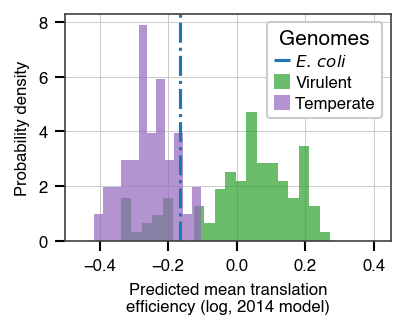

In [22]:
fig, ax = plt.subplots(figsize=(2.8, 2))
ax.hist(mean_virus_vir, 20, color=colors[2], label='Virulent', alpha=0.7, density=True)
ax.hist(mean_virus_temp, 12, color=colors[4], label='Temperate', alpha=0.7, density=True)
ax.axvline(host_mean, color=colors[0], linestyle='-.', label='$E.\, coli$')
ax.set_ylabel('Probability density')
plt.legend(title='Genomes', framealpha=1.0, handlelength=1, handleheight=1, handletextpad=0.3, labelspacing=0.3)
ax.set_xlabel('Predicted mean translation\nefficiency (log, 2014 model)')
ax.set_xlim(-0.5, 0.45)
plt.savefig(figs_dir + '/teff_model_2014_ecoli_lifestyle.png', dpi=300, bbox_inches='tight')

In [ ]:
print(len(mean_virus_temp))